# This noteboook is used to get predictions for heat transfer coefficient (h) and sulfur average temperature (T)
### *Maximum time for accurate predictions is t=7200s*

### Import tools to get and plot results

In [1]:
from stesml.stes_model import stes_model
from stesml.plot_tools import plot_results
from stesml.plot_tools import save_figures

/Users/kmenear/Projects/sulfur_tes_ml/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Get predictions for heat transfer coefficient, up until some end time

       flow-time   Tw   Ti        h_hat
0            0.0  600  500     2.622988
1            0.1  600  500  1179.516846
2            0.2  600  500   798.808594
3            0.3  600  500   634.471924
4            0.4  600  500   543.899475
...          ...  ...  ...          ...
71995     7199.5  600  500    37.552547
71996     7199.6  600  500    37.552547
71997     7199.7  600  500    37.552547
71998     7199.8  600  500    37.552547
71999     7199.9  600  500    37.552547

[72000 rows x 4 columns]


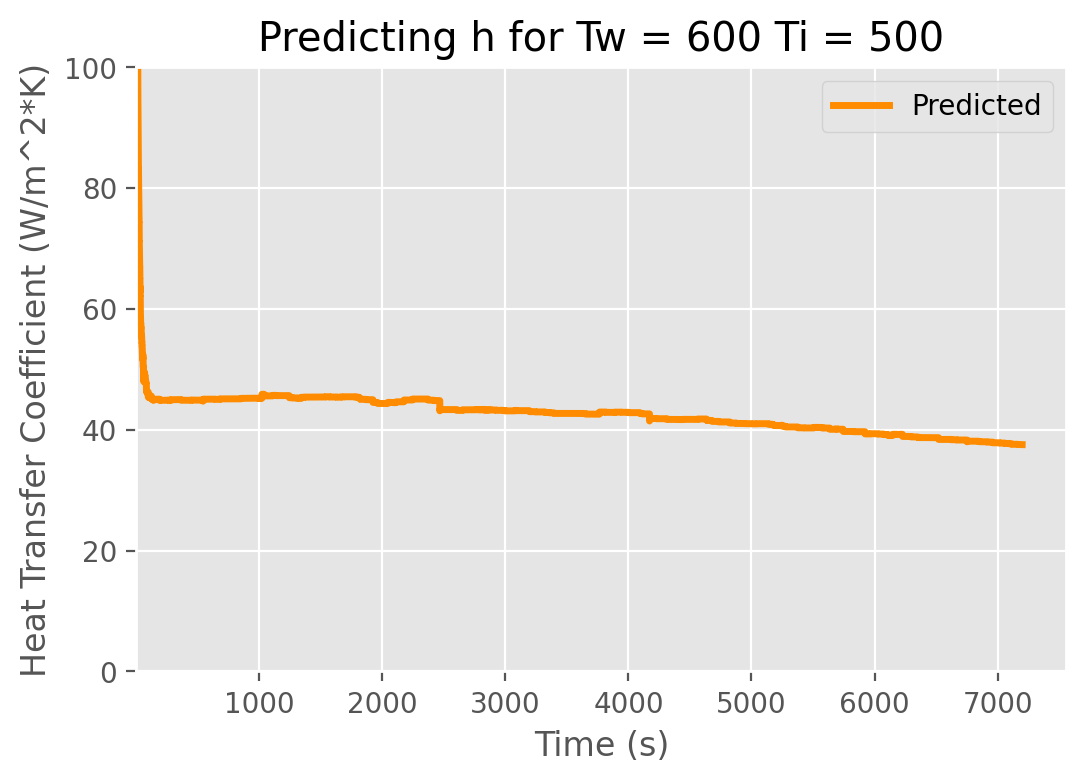

In [2]:
Ti = 500
Tw = 600
end_time = 7200
stepsize = 0.1
model_name = 'XGBoost_h_model'
model_type = 'XGBoost'

X = stes_model.predict_h(Ti, Tw, end_time, stepsize, model_name, model_type)

print(X)
figure = plot_results(X)

### Optionally save this figure

In [3]:
figures_directory = save_figures(figure)
print(f'Figure saved to {figures_directory}')

Figure saved to ../figures/20220727-142303/


### Get predictions for heat transfer coefficient at a specific time

In [4]:
Ti = 500
Tw = 600
time = 2000
model_name = 'XGBoost_h_model'
model_type = 'XGBoost'

h = stes_model.predict_h_at_time_t(Ti, Tw, time, model_name, model_type)

print(f'h is {h} at time {time}s.')

h is 44.38107681274414 at time 2000s.


### Get predictions for sulfur average temperature, up until some end time

       flow-time   Tw   Ti    Tavg_hat
0            0.0  600  500  500.219147
1            0.1  600  500  500.248962
2            0.2  600  500  500.278809
3            0.3  600  500  500.308655
4            0.4  600  500  500.338470
...          ...  ...  ...         ...
71995     7199.5  600  500  551.173558
71996     7199.6  600  500  551.173966
71997     7199.7  600  500  551.174374
71998     7199.8  600  500  551.174782
71999     7199.9  600  500  551.175189

[72000 rows x 4 columns]


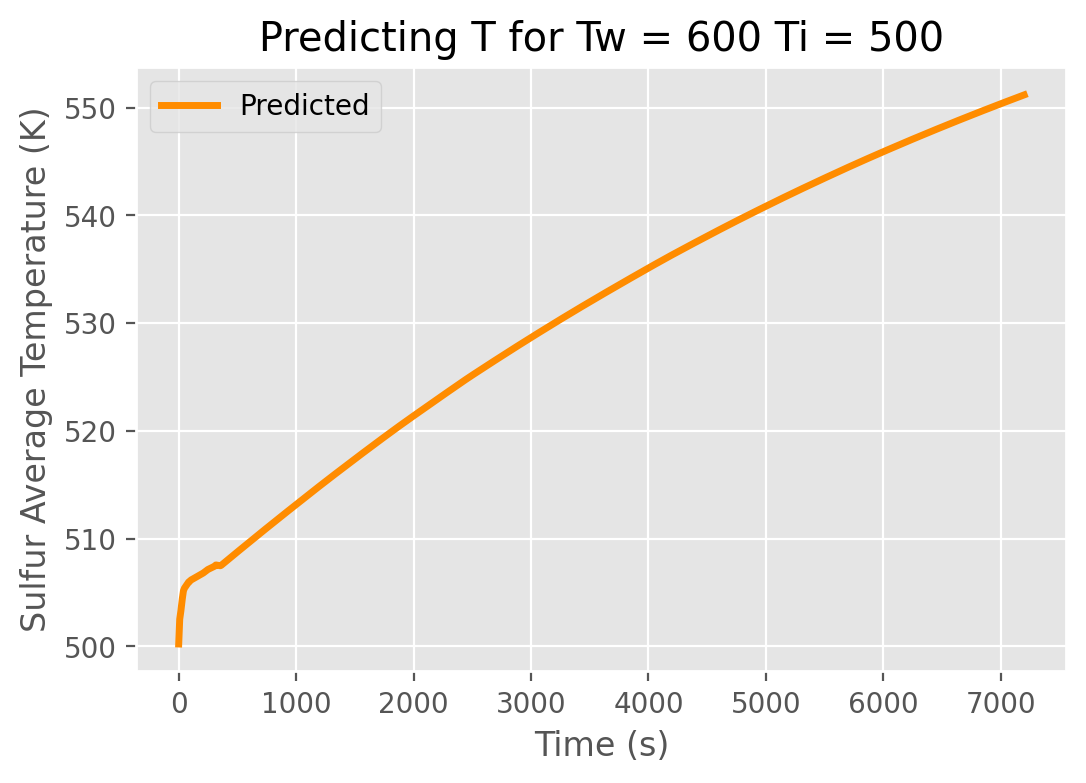

In [8]:
Ti = 500
Tw = 600
end_time = 7200
stepsize = 0.1
T_model_name='NN_T_model_tLessThan360'
T_model_type='NN'
hybrid_model=True

if hybrid_model:
    h_model_name='XGBoost_h_model'
    h_model_type='XGBoost'
    hybrid_split_time=360
    X = stes_model.predict_T(Ti, Tw, end_time, stepsize, T_model_name, T_model_type, hybrid_model, h_model_name, h_model_type, hybrid_split_time)
else:
    X = stes_model.predict_T(Ti, Tw, end_time, stepsize, T_model_name, T_model_type)

print(X)
figure = plot_results(X)

### Optionally save this figure

In [6]:
figures_directory = save_figures(figure)
print(f'Figure saved to {figures_directory}')

Figure saved to ../figures/20220727-142306/


### Get predictions for sulfur average temperature at a specific time

In [11]:
Ti = 500
Tw = 600
time = 7000
T_model_name='NN_T_model_tLessThan360'
T_model_type='NN'
hybrid_model=True

if hybrid_model:
    h_model_name='XGBoost_h_model'
    h_model_type='XGBoost'
    hybrid_split_time=360
    T = stes_model.predict_T_at_time_t(Ti, Tw, time, T_model_name, T_model_type, hybrid_model, h_model_name, h_model_type, hybrid_split_time)
else:
    T = stes_model.predict_T_at_time_t(Ti, Tw, time, T_model_name, T_model_type)
    
print(f'T is {T} at time {time}s.')

T is 550.3493204830952 at time 7000s.
